In [124]:
from random import randint
from random import random
import pandas as pd
df = pd.read_csv("../genres_v2M.csv")
df = df.drop(columns = ["title", "analysis_url", "id"])
fields = {"Fields":[str(x) for x in df.columns], "Types":[str(df[x].dtype) for x in df.columns], 
         "Missing Data": ["True" if df[x].isnull().any() else "False" for x in df.columns]}
display(df.sample(10))
display(df.info())
fields_DataFrame = pd.DataFrame(data=fields)
display(fields_DataFrame)

df["duration_ms"] = [-x if randint(0,10) == 3 else x for x in df["duration_ms"].values]
df["loudness"] = [randint(70, 120) if randint(0,100) == 42 else x for x in df["loudness"].values]
df["key"] = [x+random() for x in df["key"].values]
display(df.sample(5))

C:\Users\96653\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,duration_ms,time_signature,genre,song_name,Unnamed: 0
34007,0.436,0.938,2,5.684260,1,0.0917,0.000521,0.009070,0.3440,0.131,149.993,audio_features,spotify:track:67o4NHPeKGTkNuKnrojUc1,https://api.spotify.com/v1/tracks/67o4NHPeKGTk...,272951,4,trap,NaN,12593.0
23751,0.737,0.922,7,0.937399,1,0.0606,0.001400,0.092500,0.0844,0.720,127.016,audio_features,spotify:track:71laArCs52Lp2XfSrJBLoc,https://api.spotify.com/v1/tracks/71laArCs52Lp...,325500,3,techhouse,NaN,2246.0
28079,0.216,0.973,2,1.889223,1,0.0496,0.000355,0.908000,0.1710,0.677,138.023,audio_features,spotify:track:4yMvuIDVp2kJnmMccBkvIB,https://api.spotify.com/v1/tracks/4yMvuIDVp2kJ...,230379,3,trance,NaN,6623.0
4962,0.710,0.632,9,10.039431,0,0.0822,0.129000,0.000003,0.2120,0.218,140.026,audio_features,spotify:track:1cZfcbIJLHaJ0cXdsqAufP,https://api.spotify.com/v1/tracks/1cZfcbIJLHaJ...,138765,4,Underground Rap,Long Gone (Save Me From This Hell),NaN
17931,0.575,0.634,1,1.663861,1,0.0680,0.064600,0.000000,0.0878,0.191,109.825,audio_features,spotify:track:57qiTKh8bVX0VtfUNTQqhw,https://api.spotify.com/v1/tracks/57qiTKh8bVX0...,198653,4,RnB,Nothing Without You,NaN
38356,0.629,0.904,10,0.319961,0,0.1040,0.002400,0.893000,0.3220,0.414,173.998,audio_features,spotify:track:2iItAMV1bCSHRZsCjcGCva,https://api.spotify.com/v1/tracks/2iItAMV1bCSH...,253893,4,dnb,NaN,16973.0
6156,0.457,0.965,1,0.360105,1,0.4860,0.085000,0.000000,0.6970,0.604,170.122,audio_features,spotify:track:68Y3zzmt2XxzheQVGbbJt4,https://api.spotify.com/v1/tracks/68Y3zzmt2Xxz...,632625,4,Underground Rap,GENOCIDE,NaN
25310,0.716,0.493,5,-0.055183,0,0.1180,0.228000,0.933000,0.0946,0.132,133.999,audio_features,spotify:track:3WKvKy2pBIx2n4URJea5sn,https://api.spotify.com/v1/tracks/3WKvKy2pBIx2...,358982,4,techno,NaN,3823.0
16480,0.443,0.651,2,0.172606,1,0.3150,0.303000,0.000000,0.2400,0.574,146.170,audio_features,spotify:track:39WcoPVD5ryq3oFmiJmMQh,https://api.spotify.com/v1/tracks/39WcoPVD5ryq...,215067,4,RnB,If You,NaN
26036,0.749,0.989,7,0.218041,1,0.0563,0.002570,0.918000,0.0534,0.306,135.994,audio_features,spotify:track:0bUrPymZDPSoeiBONs0Fg7,https://api.spotify.com/v1/tracks/0bUrPymZDPSo...,426933,4,techno,NaN,4560.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  uri               42305 non-null  object 
 13  track_href        42305 non-null  object 
 14  duration_ms       42305 non-null  int64  
 15  time_signature    42305 non-null  int64  
 16  genre             42305 non-null  object

None

,Fields,Types,Missing Data
0,danceability,float64,False
1,energy,float64,False
2,key,int64,False
3,loudness,float64,False
4,mode,int64,False
5,speechiness,float64,False
6,acousticness,float64,False
7,instrumentalness,float64,False
8,liveness,float64,False
9,valence,float64,False


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,duration_ms,time_signature,genre,song_name,Unnamed: 0
27984,0.665,0.718,7.038166,0.307958,1,0.065,0.00117,0.726000,0.746,0.074,138.021,audio_features,spotify:track:5cQRT3tkj3f3Ne3JSr8GvO,https://api.spotify.com/v1/tracks/5cQRT3tkj3f3...,452571,4,trance,NaN,6528.0
21366,0.881,0.666,6.118853,-4.087011,0,0.378,0.04660,0.000002,0.119,0.780,183.094,audio_features,spotify:track:6LC4vlTlG7MPZ6wYRXGPC8,https://api.spotify.com/v1/tracks/6LC4vlTlG7MP...,253893,4,Hiphop,Do What U Feel,NaN
25840,0.801,0.718,7.075586,1.054891,1,0.113,0.00598,0.865000,0.104,0.113,126.993,audio_features,spotify:track:5IpRsQRQypVnNEVouFTN93,https://api.spotify.com/v1/tracks/5IpRsQRQypVn...,338706,4,techno,NaN,4360.0
18652,0.550,0.692,6.201849,0.087449,0,0.369,0.29900,0.000007,0.198,0.593,146.453,audio_features,spotify:track:6TRVvpoVFwyYyIGTFh0Y7P,https://api.spotify.com/v1/tracks/6TRVvpoVFwyY...,361942,4,Hiphop,P&P 1.5,NaN
18543,0.494,0.887,6.416654,1.306573,0,0.398,0.00661,0.000000,0.103,0.548,179.108,audio_features,spotify:track:1l6DvDFssUqMnsFJNFnrRJ,https://api.spotify.com/v1/tracks/1l6DvDFssUqM...,-234627,4,Hiphop,99 Problems,NaN


In [120]:
# Part 2.a

fields = pd.DataFrame(data = [df[c].dtype for c in df.columns], index = [df.columns], columns = ["Type"])
display(fields)
display(df)

,Type
danceability,float64
energy,float64
key,float64
loudness,float64
mode,int64
speechiness,float64
acousticness,float64
instrumentalness,float64
liveness,float64
valence,float64


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,duration_ms,time_signature,genre,song_name,Unnamed: 0
0,0.831,0.814,2.361742,0.409704,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,124539,4,Dark Trap,Mercury: Retrograde,NaN
1,0.719,0.493,8.400711,5.311626,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,224427,4,Dark Trap,Pathology,NaN
2,0.850,0.893,5.735843,-17.250003,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,98821,4,Dark Trap,Symbiote,NaN
3,0.476,0.781,0.010249,1.453015,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN
4,0.798,0.624,2.507237,0.173787,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,123298,4,Dark Trap,Venom,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4.502230,6.190635,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,269208,4,hardstyle,NaN,20995.0
42301,0.517,0.768,0.361149,0.428377,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,210112,4,hardstyle,NaN,20996.0
42302,0.361,0.821,8.451362,0.634543,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,234823,4,hardstyle,NaN,20997.0
42303,0.477,0.921,6.325645,0.615231,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,323200,4,hardstyle,NaN,20998.0


In [121]:
# Part 2.b

null_columns=df.columns[df.isna().any()]
print('Columns with NaN values are:', null_columns.tolist())

for c in null_columns:
    if df[c].dtype!='object':
        value = df[c].mean()
    else:
        value = df[c].mode()
        value = value[0]  
    df[c].fillna(value,inplace=True)

display(df)

Columns with NaN values are: ['song_name', 'Unnamed: 0']


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,duration_ms,time_signature,genre,song_name,Unnamed: 0
0,0.831,0.814,2.361742,0.409704,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,124539,4,Dark Trap,Mercury: Retrograde,10483.970645
1,0.719,0.493,8.400711,5.311626,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,224427,4,Dark Trap,Pathology,10483.970645
2,0.850,0.893,5.735843,-17.250003,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,98821,4,Dark Trap,Symbiote,10483.970645
3,0.476,0.781,0.010249,1.453015,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),10483.970645
4,0.798,0.624,2.507237,0.173787,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,123298,4,Dark Trap,Venom,10483.970645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4.502230,6.190635,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,269208,4,hardstyle,Forever,20995.000000
42301,0.517,0.768,0.361149,0.428377,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,210112,4,hardstyle,Forever,20996.000000
42302,0.361,0.821,8.451362,0.634543,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,234823,4,hardstyle,Forever,20997.000000
42303,0.477,0.921,6.325645,0.615231,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,323200,4,hardstyle,Forever,20998.000000


(42305, 14)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'danceability'),
  Text(1, 0, 'energy'),
  Text(2, 0, 'key'),
  Text(3, 0, 'loudness'),
  Text(4, 0, 'mode'),
  Text(5, 0, 'speechiness'),
  Text(6, 0, 'acousticness'),
  Text(7, 0, 'instrumentalness'),
  Text(8, 0, 'liveness'),
  Text(9, 0, 'valence'),
  Text(10, 0, 'tempo'),
  Text(11, 0, 'duration_ms'),
  Text(12, 0, 'time_signature'),
  Text(13, 0, 'Unnamed: 0')])

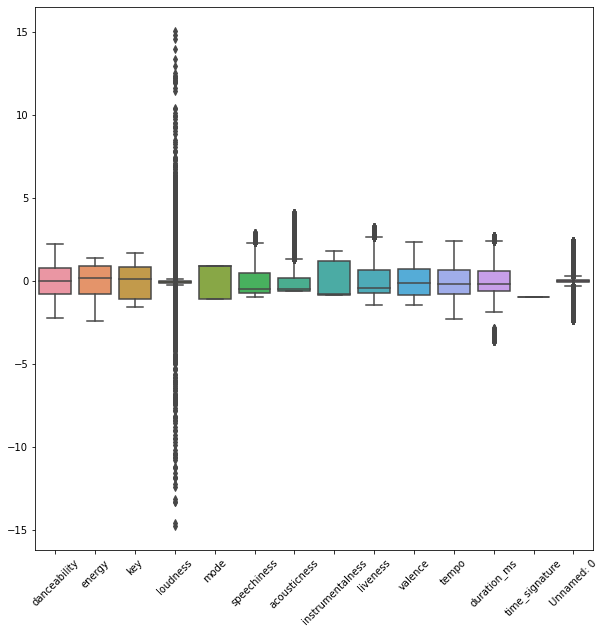

In [122]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

scaled_values = StandardScaler().fit_transform(df.select_dtypes(exclude="object"))

df2=pd.DataFrame(scaled_values,columns=df.select_dtypes(exclude="object").columns)
print(df2.shape)

threshold = 2

selected_rows= (df2<threshold).all(axis=1)  & (df2>-threshold).all(axis=1)
selected_index=df[~selected_rows].index
df2.drop(index=selected_index,inplace=True) # for analysis
ndf=df.drop(index=selected_index)  #     for interpretation
ndf.reset_index(inplace = True, drop = True) # to reset the index 
# Create the Scaler object
scaler = StandardScaler()

# Fit data on the scaler object
scaled_values=scaler.fit_transform(df2)
df2 = pd.DataFrame(scaled_values, columns=df.select_dtypes(exclude="object").columns)


import seaborn as sns 
plt.figure(figsize=(10,10))
sns.boxplot(data=df2)
plt.xticks(rotation=45)

In [123]:
display(df.corr())
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
danceability,1.000000,-0.323248,-0.012633,0.000423,0.084413,0.182177,0.069910,-0.067114,-0.196702,0.369845,-0.165929,-0.017928,0.057711,-0.387927
energy,-0.323248,1.000000,0.044506,-0.000069,-0.032203,-0.148363,-0.497334,0.303875,0.231754,-0.013520,-0.024504,0.136714,0.039781,0.094995
key,-0.012633,0.044506,1.000000,0.003820,-0.247292,-0.029990,-0.004897,0.068062,0.003148,0.028229,-0.010225,0.030715,0.008190,-0.010800
loudness,0.000423,-0.000069,0.003820,1.000000,0.002896,-0.002249,-0.008071,-0.001759,-0.002699,-0.003066,-0.002822,0.002668,0.000802,0.003883
mode,0.084413,-0.032203,-0.247292,0.002896,1.000000,0.050260,-0.014514,-0.016402,0.007280,0.022208,-0.012191,-0.011854,-0.009317,-0.073098
speechiness,0.182177,-0.148363,-0.029990,-0.002249,0.050260,1.000000,0.160184,-0.386571,0.057432,0.218829,0.164674,-0.142426,0.021637,0.092713
acousticness,0.069910,-0.497334,-0.004897,-0.008071,-0.014514,0.160184,1.000000,-0.261896,-0.107229,0.099328,0.055643,-0.109320,-0.049791,0.014904
instrumentalness,-0.067114,0.303875,0.068062,-0.001759,-0.016402,-0.386571,-0.261896,1.000000,-0.015990,-0.257068,-0.207667,0.283850,-0.010164,-0.318885
liveness,-0.196702,0.231754,0.003148,-0.002699,0.007280,0.057432,-0.107229,-0.015990,1.000000,-0.025156,0.028327,0.000316,0.003077,0.136065
valence,0.369845,-0.013520,0.028229,-0.003066,0.022208,0.218829,0.099328,-0.257068,-0.025156,1.000000,0.058374,-0.091613,0.040308,-0.148567
